In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('NYPD_Shooting_Incident_Data__Historic__20240921.csv')

In [21]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,244608249,05/05/2022,00:10:00,MANHATTAN,INSIDE,14,0.0,COMMERCIAL,VIDEO STORE,True,...,M,BLACK,25-44,M,BLACK,986050.000,214231.000000,40.754692,-73.993500,POINT (-73.9935 40.754692)
1,247542571,07/04/2022,22:20:00,BRONX,OUTSIDE,48,0.0,STREET,(null),True,...,(null),(null),18-24,M,BLACK,1016802.000,250581.000000,40.854402,-73.882330,POINT (-73.88233 40.854402)
2,84967535,05/27/2012,19:35:00,QUEENS,NaN,103,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1048632.000,198262.000000,40.710634,-73.767773,POINT (-73.76777349199995 40.71063412500007)
3,202853370,09/24/2019,21:00:00,BRONX,NaN,42,0.0,NaN,NaN,False,...,M,UNKNOWN,25-44,M,BLACK,1014493.000,242565.000000,40.832417,-73.890714,POINT (-73.89071440599997 40.832416753000075)
4,27078636,02/25/2007,21:00:00,BROOKLYN,NaN,83,0.0,NaN,NaN,False,...,M,BLACK,25-44,M,BLACK,1009149.375,190104.703125,40.688443,-73.910219,POINT (-73.91021857399994 40.68844345900004)


In [22]:
df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.856200e+04,28562.000000,28560.000000,2.856200e+04,28562.000000,28503.000000,28503.000000
mean,1.274058e+08,65.496009,0.321884,1.009424e+06,208380.075755,40.738570,-73.909099
std,7.804340e+07,27.342643,0.733035,1.830111e+04,31917.509528,0.087611,0.065967
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.543991e+07,44.000000,0.000000,1.000068e+06,182912.000000,40.668648,-73.942917
50%,9.271125e+07,67.000000,0.000000,1.007772e+06,194901.390625,40.701467,-73.915068
75%,2.031320e+08,81.000000,0.000000,1.016807e+06,239814.234375,40.824878,-73.882366
max,2.797581e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [23]:
df.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      59
Longitude                     59
Lon_Lat                       59
dtype: int64

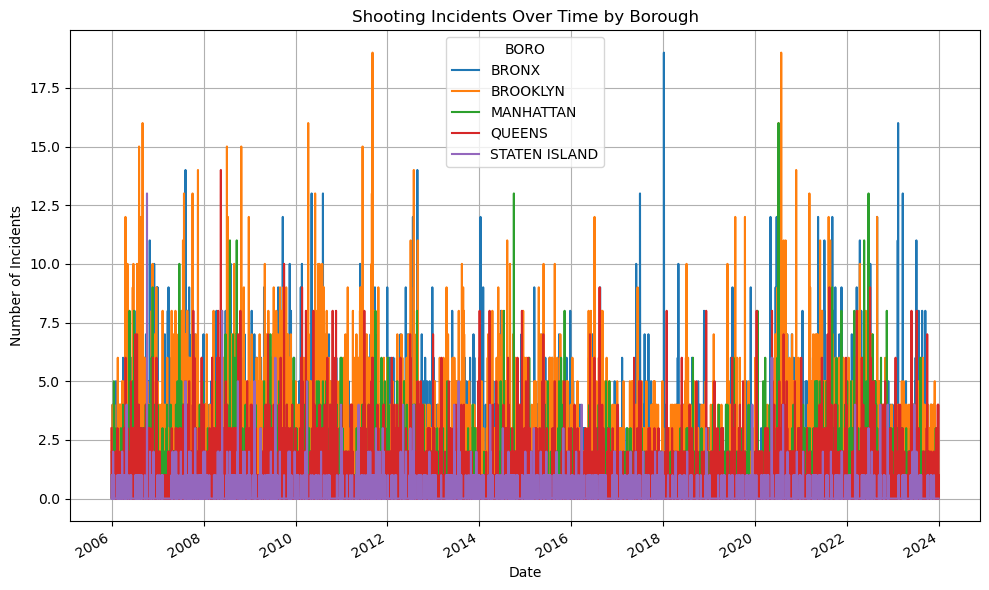

In [24]:
import matplotlib.pyplot as plt
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
grouped_data = df.groupby(['OCCUR_DATE', 'BORO']).size().unstack(fill_value=0)
grouped_data.plot(kind='line', figsize=(10,6), title='Shooting Incidents Over Time by Borough')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Ensure OCCUR_DATE is in datetime format
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])

# Find the earliest and latest date in the data
min_date = df['OCCUR_DATE'].min()
max_date = df['OCCUR_DATE'].max()

print(f"The data covers from {min_date.year} to {max_date.year}.")


The data covers from 2006 to 2023.
